# SyriaTel Telecommunications company churn predictions
### A study by Frederick Reichheld of Bain & Company,found that acquiring a new customer can be anywhere from five to 25 times more expensive than retaining an existing one. Additionally, Harvard Business Review has highlighted similar findings, emphasizing the value of keeping existing customers happy

# 1. INTRODUCTION :BUSSNESS PROBLEM

### What is Customer Churn?
#### Customer churn occurs when customers or subscribers stop doing business with a company or service.

### In the telecom industry, customers have a wide range of service providers to choose from and often switch between them. This competitive market sees an annual churn rate of 15-25 percent.

### Individualized CUSTOMER RETENTION can be challenging because most companies have a large number of customers and cannot afford to dedicate significant time to each one. The costs would be too high, outweighing the additional revenue. However, if a company could predict which customers are likely to leave ahead of time, it could focus its retention efforts on these "high-risk" clients. The ultimate goal is to expand its coverage area and boost customer loyalty. The key to success in this market lies in the customer itself.

### CUSTOMER CHURN is a critical metric because retaining existing customers is much LESS EXPENSIVE than acquiring new ones.To REDUCE customer churn, telecom COMPANIES NEED TO PREDICT WICH CUSTOMERS HAVE A HIGHER CHANCE OF LEAVING. To detect early signs of potential churn, companies must develop a holistic view of their customers and their interactions across various channels, including store visits, product purchase histories, customer service calls, web-based transactions, and social media interactions.

### By addressing churn, these businesses can not only maintain their market position but also grow and thrive. The more customers they have in their network, the lower the cost of initiation and the higher the profit. As a result, reducing client attrition and implementing effective retention strategies are key focuses for a COMPANYS'S SUCESS.

# 2.OBJECTIVES


#### 1.Churn Rate: Determine the percentage of customers who churn versus those who remain with active services.
#### 2.Geographical Insights: Identify the states with the highest number of customers and those with the most churned customers.
#### 3.Service Plan Impact: Assess the impact of service plans (international and voice mail) on customer churn.
#### 4.Usage Patterns: Examine the correlation between usage patterns (day minutes, day charges, international charges) and customer churn.
#### 5.Customer Service Interaction: Analyze the relationship between customer service interactions and churn.
#### 6.Feature Analysis: Investigate the correlation between  features and customer churn.
#### 7.Model creation: create models to predict customers who are more likely to churn



# 3.LOADING  LIBRARIES AND THE DATA

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore",)


In [2]:
# load data
df = pd.read_csv(r"C:\Users\josep\OneDrive\Documents\Data Science 💵\project\phase 3\bigml_59c28831336c6604c800002a.csv")

# 4.DATA UNDERSTANDING

In [3]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [5]:
df.shape

(3333, 21)

In [6]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [7]:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

the data set has 3,333 rows and 21 column of wich 16 are numeical and the rest categorical
the rows contain the customers info while the columns contain the atributes : area, charges, subscription etc

Churn is going to be our dependent variable and its a boolean value

# 5.DATA MANIPULATION

In [8]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [9]:
# drop the unecessary columns
df=df.drop(['phone number'],axis=1)
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [10]:
# checking the missing values
df.isnull().sum()

state                     0
account length            0
area code                 0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

our data dosent have any missing values

In [11]:
# cheking the the data types of our columns to see if there ok
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   international plan      3333 non-null   object 
 4   voice mail plan         3333 non-null   object 
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   

we see that our columns have the correct data types

# 6.DATA VISUALIZATION & ANALYSIS

In [12]:
# checking the persentage of people who churned 
labels = df['churn'].value_counts(normalize=True).index
values = df['churn'].value_counts(normalize=True).values

fig = px.pie(df, values=values, names=labels, title='Percentage of Churned Customers')
fig.show()

the percentage of customers who churned is 14.5% of the total number of customers this indicates class imbalance

In [13]:
# to get the number of customers per state
X=df['state']

fig = px.histogram(df, x=X, title='Number of Customers per State')

fig.show()

In [14]:
# to get the top 5 states
df['state'].value_counts().head(5)

state
WV    106
MN     84
NY     83
AL     80
WI     78
Name: count, dtype: int64

we have discovered that that the top 5 states with the most customers are WV,MN,NY,AL,WI

In [15]:
# to see the number of customers who churned from each state
fig=px.histogram(df,x='state',color='churn',barmode='group',title='customers per state who churned')
fig.show()

In [16]:
# to look at the top 5 states with the most churned customers
churn_yes=df[df['churn']==True]
state_churn_counts=churn_yes['state'].value_counts()
state_churn_top_5_counts=state_churn_counts.head(5)
print(f"here are the top 5 states with the most chuned customers {state_churn_top_5_counts}")

here are the top 5 states with the most chuned customers state
NJ    18
TX    18
MD    17
MI    16
NY    15
Name: count, dtype: int64


we have found the most chuned customers come from this 5 states NJ,TX,MD,MI,NY

In [17]:
# a box plot of number of churn customers based on the account length
fig=px.box(df,x='churn',y='account length',title='Number of Churn Customers based on Account Length')
fig.show()


account length alone is not a good predictor for customer churn

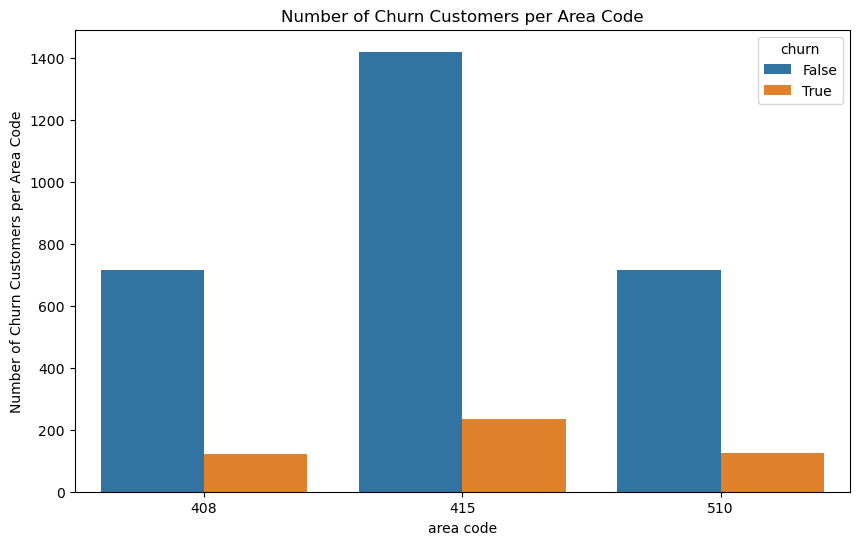

In [18]:
# number of churn customers who churned per area code
area_churns=df.groupby(['area code','churn']).size().reset_index(name='count')
plt.figure(figsize=(10,6))
sns.barplot(x='area code', y='count',hue='churn',data=area_churns)
plt.title('Number of Churn Customers per Area Code')
plt.xlabel('area code')
plt.ylabel('Number of Churn Customers per Area Code')
plt.legend(title='churn')
plt.show()

we can see that the area code is dosent influence the number of customers in a significant way

In [19]:
# chekig itenatonalplan
fig=px.histogram(df,x='international plan',color='churn',barmode='group',title='Customers with International Plan per Churn')
fig.show()

we see that customers with international plan tend to have a higher churn rate 


this may indicate that custmers are disastifie with the international plan

In [20]:
# checking voice mail plan


fig=px.histogram(df,x='voice mail plan',color='churn',barmode='group',title='Customers with Voice Mail Plan per Churn')
fig.show()


we can see that customers with voice mail plan have a lower churn rate than customers with no voice mail plan 

it can indicate there sastified with the product

we can see that a majority of the customers dont have voice mail messages plan

In [21]:
# lets look at how many customers churn due to number of voice mail plan
fig=px.box(df,x='churn',y='number vmail messages',title='churn acoording to number vmail messages')
fig.show()

custormers with no voice mails are more likely to churn.

its a good indication that most customers are satisfied with the voice mail service

In [22]:
# lets look at the number of customers who churn acoording total day minutes

fig=px.box(df,x='churn',y='total day minutes',title='churn acoording to total day minutes')
fig.show()

more custumers with high day minutes are more likely to churn.

this indicates that more customers are disastified with the day minutes service

In [23]:
# now lets look at the number of customers who churned according to total day calls

fig=px.box(df,x='churn',y='total day calls',title='churn acoording to total day calls')
fig.show()

this indicates that the total day calls dont determine how many customers churn

In [24]:
# lets look at the customers who churn according to total day charge

fig=px.box(df,x='churn',y='total day charge',title='churn acoording to total day charge')
fig.show()

this indicates that customers who charged more are more likely to churn.


this can indicate a disastifaction with the daly charge rate

In [25]:
# lets look at the customers who churn according to total eve munutes

fig=px.box(df,x='churn',y='total eve minutes',title='churn acoording to total eve minutes')
fig.show()

this shows there is little to no corilation between customer chuning and the total eve minutes.

it also shows that more customers using this service are more likely to churn showing disastifaction to this service

In [26]:
# lets look at the customers who churn according to total night minutes

fig=px.box(df,x='churn',y='total night minutes',title='churn acoording to total night minutes')
fig.show()



this shows there is little to no correlation between churning and the total night minutes

In [27]:
# lets look at the customers who churn according to total night calls

fig=px.box(df,x='churn',y='total night calls',title='churn acoording to total night calls')
fig.show()


this shows there is little to no correlation between total night calls and churning

In [28]:
# lets look at the customers who churn according to total night calls

fig=px.box(df,x='churn',y='total night charge',title='churn acoording to total night charge')
fig.show()

this shows there is little to no corilation between total night charge and customer churning

In [29]:
# lets look at the customers who churn according to total int charge

fig=px.box(df,x='churn',y='total intl minutes',title='churn acoording to total int charge')
fig.show()


this shows that there is little to no correlation between international minutes and churn

In [30]:
# lets look at the customers who churn according to total int calls

fig=px.box(df,x='churn',y='total intl calls',title='churn acoording to total int calls')
fig.show()


this shows that customers with less international calls are more likely to churn

In [31]:
# lets look at the customers who churn according to total intl charge

fig=px.box(df,x='churn',y='total intl charge',title='churn acoording to total intl charge')
fig.show()


this shows that customers with high international charges are more likely to churn

it also indicates that more customers are disastified with the high international charge 

In [32]:
# lets look at the customers who churn according to customer service calls

fig=px.box(df,x='churn',y='customer service calls',title='churn acoording to customer service calls')
fig.show()


this indicates customers with customer service calls are more likely to churn

it also indicates that more customers are disastified with the customer service

## SUMMARY:

- 1.Churn Imbalance: There is a significant imbalance between customers who churn and those who do not, with only 14% of customers churning.
- 2.Top States with Most Customers: The states with the highest number of customers are:
###### WV: West Virginia
###### MN: Minnesota
###### NY: New York
###### AL: Alabama
###### WA: Washington
- 2.States with Most Churned Customers: The states with the most churned customers are:
###### NJ: New Jersey
###### TX: Texas
###### MD: Maryland
###### MI: Michigan
###### NY: New York
- 3.Account Length: There is no correlation between account length and customer churn.
- 4.Area Codes: Area codes do not influence customer churn.
- 5.International Plan: Customers with an international plan are more likely to churn, indicating dissatisfaction with the service.
- 6.International Plan Adoption: Most customers do not have an international plan.
- 7.Voice Mail Plan: Customers with a voice mail plan are less likely to churn, suggesting satisfaction with the service.
- 8.Voice Mail Plan Adoption: Most customers do not have a voice mail plan.
- 9.Voice Mail Messages: Customers with fewer voice mail messages are more likely to churn, indicating satisfaction with the service when they use it more.
- 10.Day Minutes: Customers with high day minutes are more likely to churn, showing dissatisfaction with the service.
- 11.Total Day Calls: There is no correlation between total day calls and customer churn.
- 12.Daily Charges: Customers with high daily charges are more likely to churn, indicating dissatisfaction with the charges.
- 13.Evening Calls: Evening calls have no correlation to customer churn.
- 14.Night Minutes: There is no correlation between night minutes and customer churn.
- 15.Night Calls: There is no correlation between night calls and customer churn.
- 16.Night Charges: There is no correlation between night charges and customer churn.
- 17.International Minutes: International minutes have no correlation to customer churn.
- 18 International Calls: Customers with fewer international calls are more likely to churn.
- 19 International Charges: Customers with high international charges are more likely to churn, indicating dissatisfaction with the charges.
- 20.Customer Service: Customers who contact customer service are more likely to churn, suggesting dissatisfaction with customer service.
### By focusing on these insights, you can better understand the factors influencing customer churn and develop targeted strategies to improve customer retention and satisfaction.

# 7.DATA PREPROCESSING

were first going to make sure all numerical colums have numeric values

In [33]:
# Get a list of numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Numerical Columns:")
print(numerical_columns)

Numerical Columns:
['account length', 'area code', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']


In [34]:
# Clean the numeric columns column
for num in numerical_columns:
      df[num] = pd.to_numeric(df[num], errors='coerce')

      # Drop rows with invalid values in the numeric columns
      df = df.dropna(subset=[num])

      # Ensure the columns are of integer type
      df[num] = df[num].astype(int)

print("Cleaned DataFrame:")

df.info()


Cleaned DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   state                   3333 non-null   object
 1   account length          3333 non-null   int32 
 2   area code               3333 non-null   int32 
 3   international plan      3333 non-null   object
 4   voice mail plan         3333 non-null   object
 5   number vmail messages   3333 non-null   int32 
 6   total day minutes       3333 non-null   int32 
 7   total day calls         3333 non-null   int32 
 8   total day charge        3333 non-null   int32 
 9   total eve minutes       3333 non-null   int32 
 10  total eve calls         3333 non-null   int32 
 11  total eve charge        3333 non-null   int32 
 12  total night minutes     3333 non-null   int32 
 13  total night calls       3333 non-null   int32 
 14  total night charge      3333 non-null

In [35]:
# we are now goint to form a new list of our numerical columns
num_coll=df.select_dtypes(include='int32').columns.to_list()


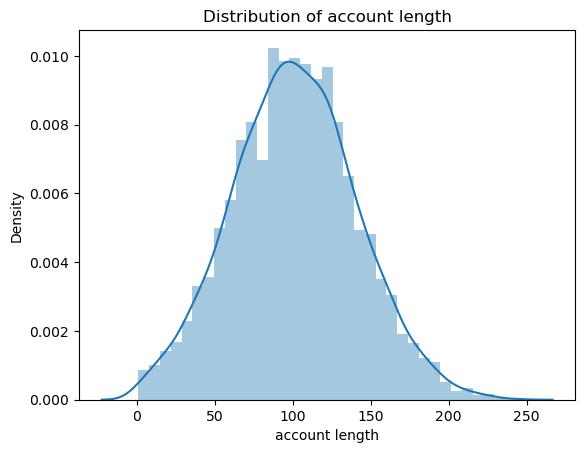

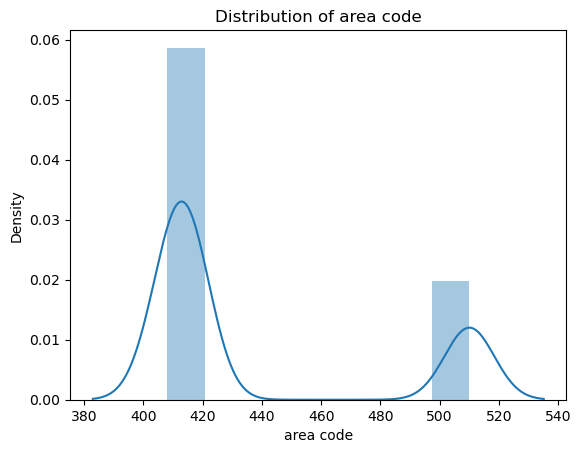

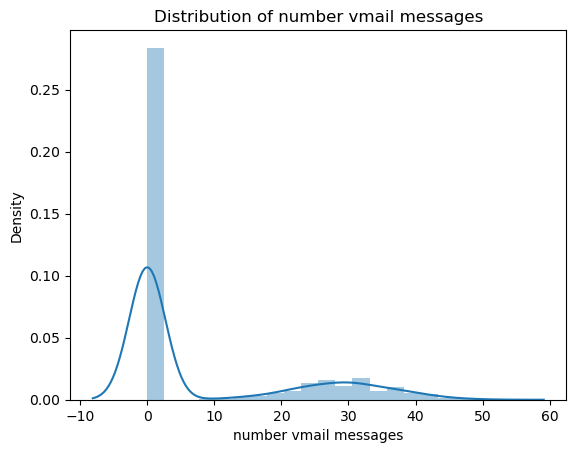

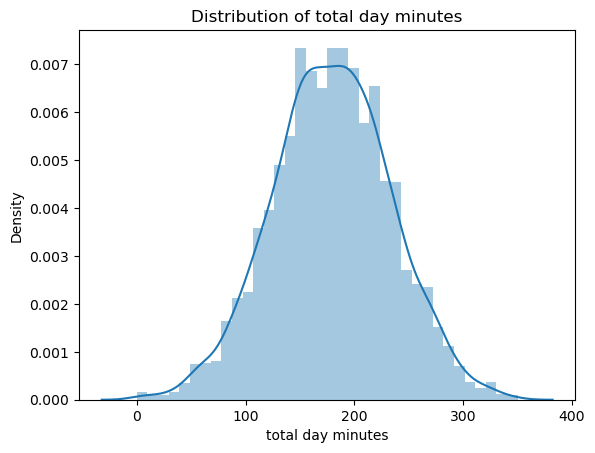

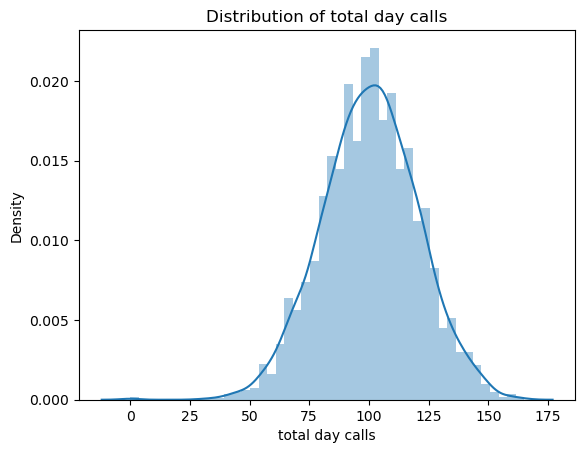

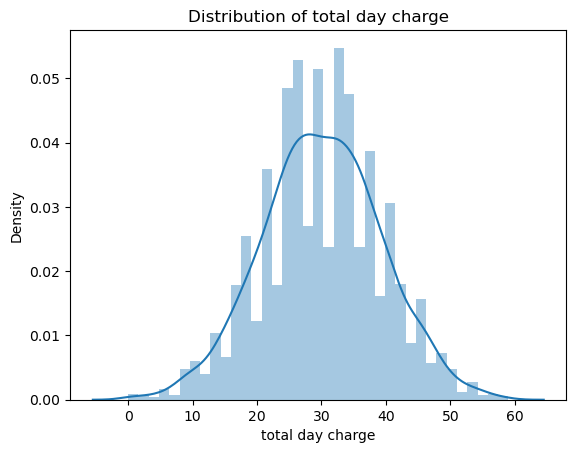

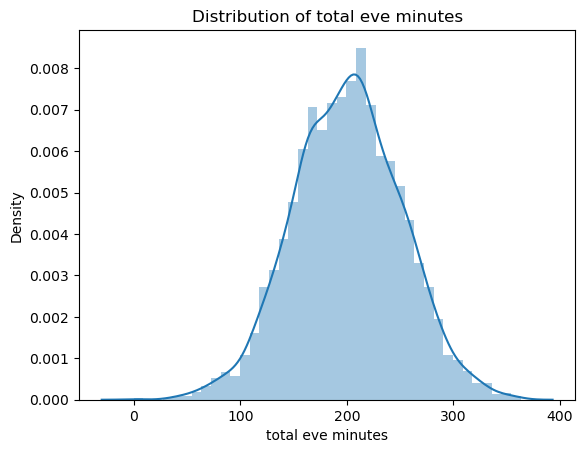

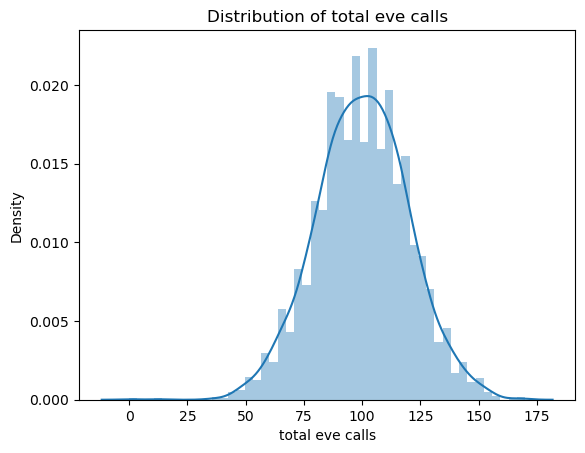

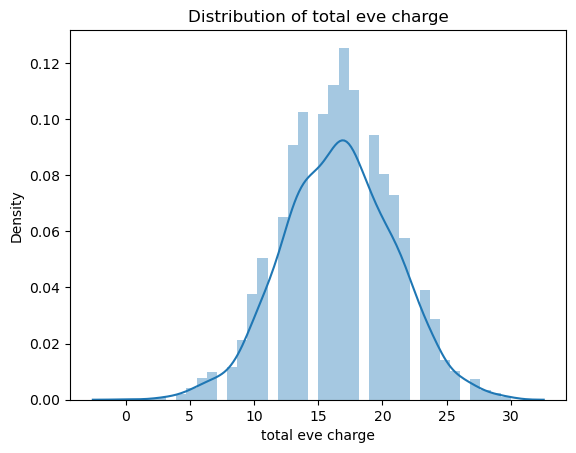

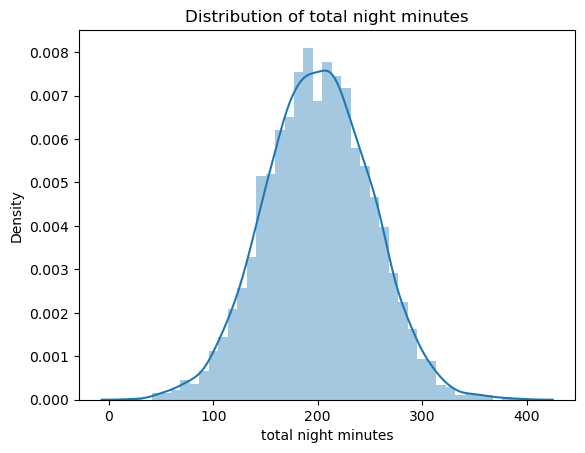

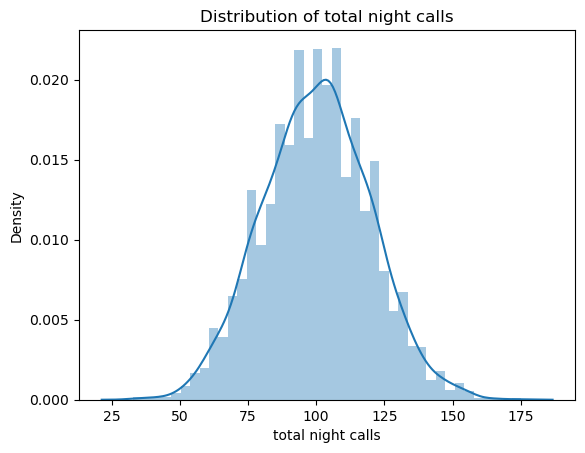

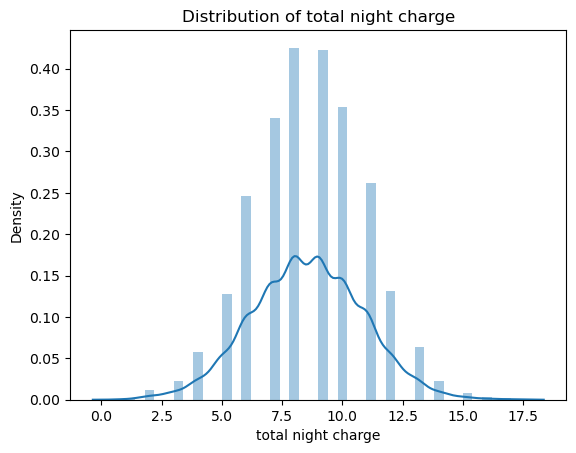

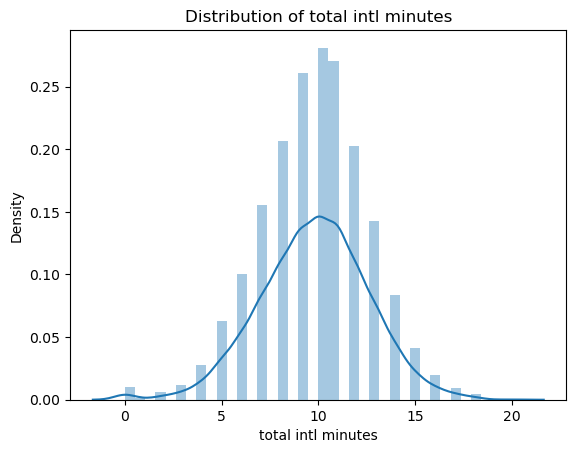

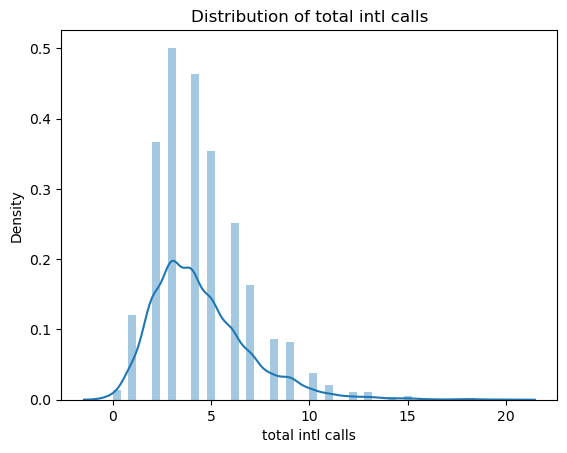

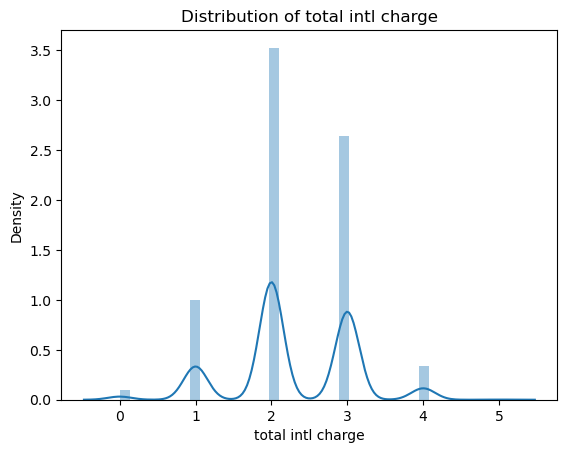

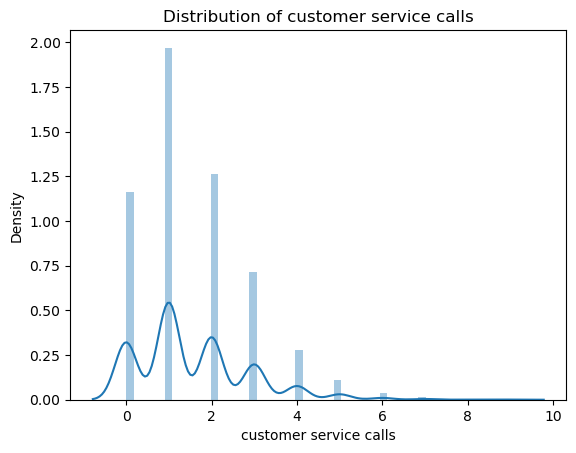

In [36]:
# Plotting the distribution of each numerical column
for feat in num_coll:
    sns.distplot(df[feat],kde=True)
    plt.title(f'Distribution of {feat}')
    plt.xlabel(feat)
    plt.ylabel('Density')
    plt.show()

- most of our columns have normal distribution 

- a few however have skewed distributions 

- we have also noticed that they have totaly different scales 

<Axes: ylabel='Density'>

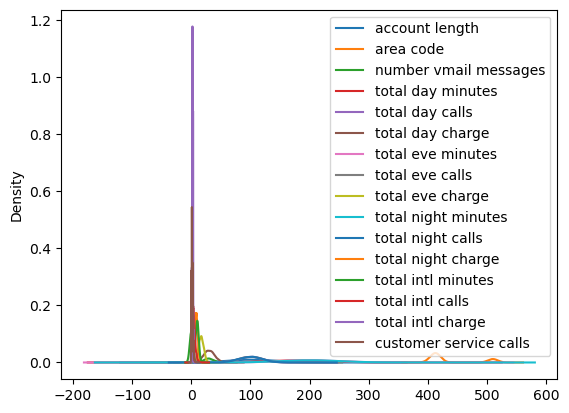

In [37]:
df.plot.kde()

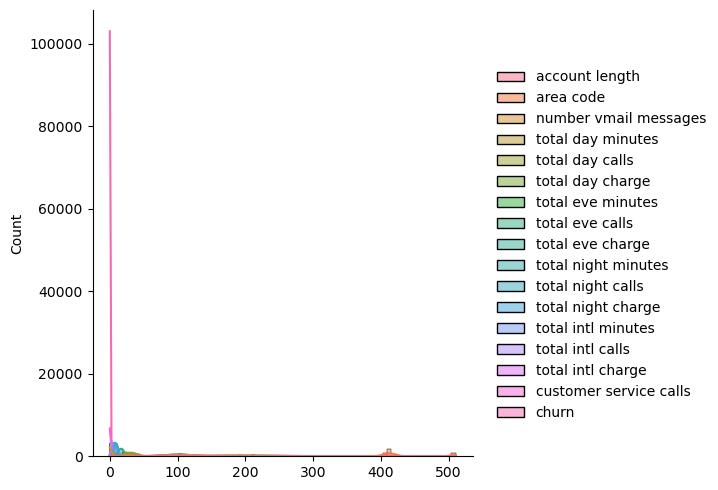

In [38]:
sns.displot(df,kde=True)

- from the obove analysis we saw that our  data has outliers and they have diffrent scales
- we also have categorical values that need to be encoded
- ive also seen  high cardinality categorical features


- solution> we are going to use powertransfomer to remove the skewness in our numerical columns and standard scaller to bring them to the same scale and one hot encoder to encode them and using frequency encoding for cardinality categorical features 

In [52]:
# importing the relevant libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [53]:
# we are going to create a copy of the data frame 
df_copy = df.copy()
df_copy_1=df.copy()

In [55]:
# Encode the target variable 'churn'
df['churn'] = df['churn'].astype(int)

# Split the data into features and target
X = df.drop(columns=['churn'])
y = df['churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# List of columns
numerical_columns = [
    'account length', 'number vmail messages', 'total day minutes', 'total day calls',
    'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge',
    'total night minutes', 'total night calls', 'total night charge',
    'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']

binary_columns = ['international plan', 'voice mail plan']
categorical_columns = ['state']
area_code_column = ['area code']

# Target encoding for state column
state_target_mean = X_train.join(y_train).groupby('state')['churn'].mean()
X_train['state'] = X_train['state'].map(state_target_mean)
X_test['state'] = X_test['state'].map(state_target_mean).fillna(state_target_mean.mean())

# Preprocessing pipelines
numerical_pipeline = Pipeline([
    ('power_transformer', PowerTransformer()),
    ('scaler', StandardScaler())
])

binary_pipeline = Pipeline([
    ('onehot', OneHotEncoder(drop='if_binary', sparse=False))
])

area_code_pipeline = Pipeline([
    ('onehot', OneHotEncoder(sparse=False))
])

# Column transformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical_columns),
    ('binary', binary_pipeline, binary_columns),
    ('area_code', area_code_pipeline, area_code_column)
], remainder='passthrough')

# Fit and transform the training data
X_train_transformed = preprocessor.fit_transform(X_train)
# transforming it to a dataframe
X_train_transformed = pd.DataFrame(X_train_transformed, columns=preprocessor.get_feature_names_out())
X_train_transformed = X_train_transformed.astype('float32')

# Transform the test data
X_test_transformed = preprocessor.transform(X_test)
# transforming it to a dataframe
X_test_transformed = pd.DataFrame(X_test_transformed, columns=preprocessor.get_feature_names_out())
X_test_transformed = X_test_transformed.astype('float32')


# 8. MACHINE LEARNING MODEL AND  EVALUATION 

- we are now going to build our clasification models to predict wich customers are more likely to churn
- the main key focus is to reduce the number of false negatives while increasing the number of true positives 

## 8.1.BASIC MACHINE LEARNING MODLELS AND EVALUATIION 

### Here we are gona train the model with  no tuning or any special changes to the data this will be our basic model

In [42]:
# importing the relevant libraries
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

logistic_regression Accuracy: 0.8665667166416792
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       570
           1       0.61      0.23      0.33        97

    accuracy                           0.87       667
   macro avg       0.75      0.60      0.63       667
weighted avg       0.84      0.87      0.84       667

logistic_regression ROC-AUC Score: 0.6011213601012843



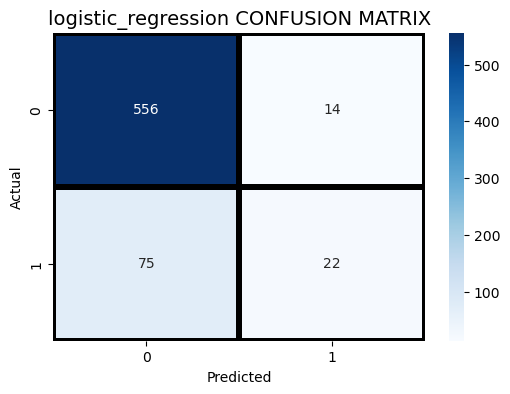

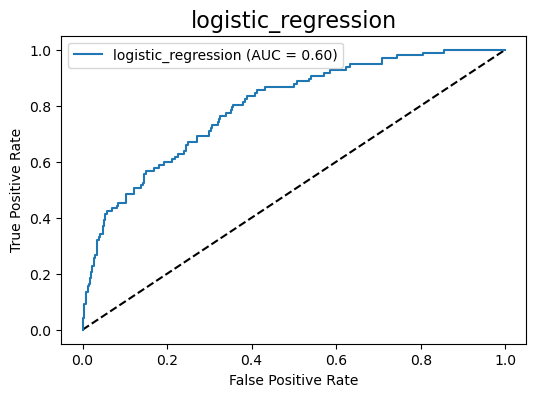

Ada_boost_classifier Accuracy: 0.8575712143928036
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       570
           1       0.52      0.34      0.41        97

    accuracy                           0.86       667
   macro avg       0.70      0.64      0.66       667
weighted avg       0.84      0.86      0.84       667

Ada_boost_classifier ROC-AUC Score: 0.6429101103273649



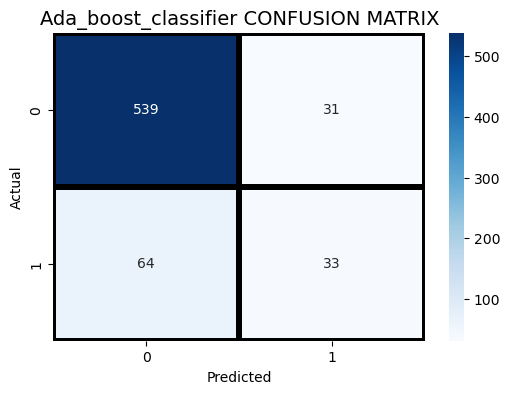

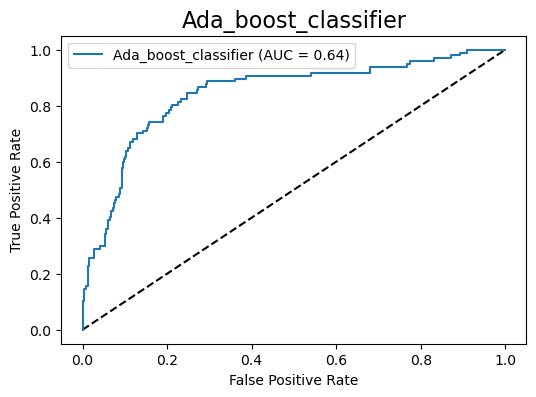

gradient_boosting_classifier Accuracy: 0.9460269865067467
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       570
           1       0.90      0.71      0.79        97

    accuracy                           0.95       667
   macro avg       0.92      0.85      0.88       667
weighted avg       0.94      0.95      0.94       667

gradient_boosting_classifier ROC-AUC Score: 0.8486525592331344



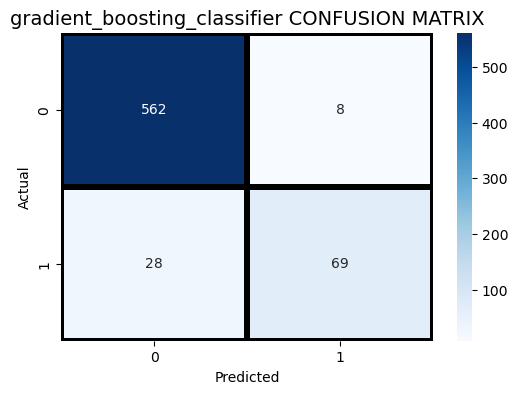

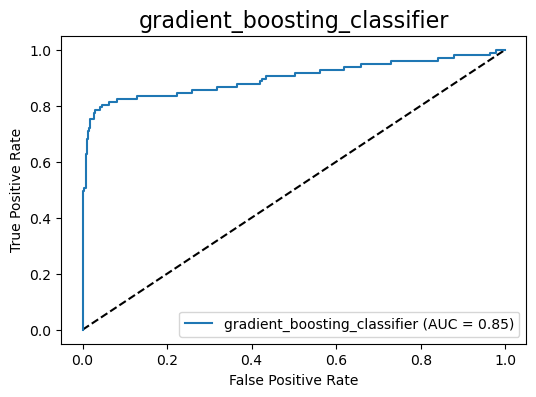

decision_tree_classifier Accuracy: 0.8995502248875562
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       570
           1       0.65      0.66      0.66        97

    accuracy                           0.90       667
   macro avg       0.80      0.80      0.80       667
weighted avg       0.90      0.90      0.90       667

decision_tree_classifier ROC-AUC Score: 0.800072345812986



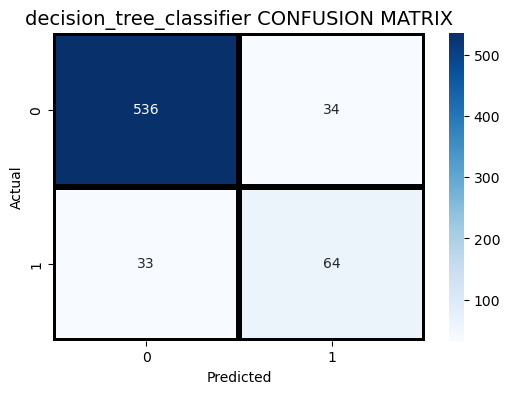

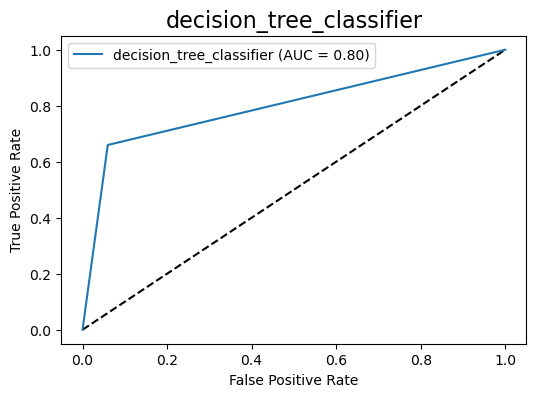

random_forest_classifier Accuracy: 0.9385307346326837
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       570
           1       0.90      0.65      0.75        97

    accuracy                           0.94       667
   macro avg       0.92      0.82      0.86       667
weighted avg       0.94      0.94      0.93       667

random_forest_classifier ROC-AUC Score: 0.8186019171640441



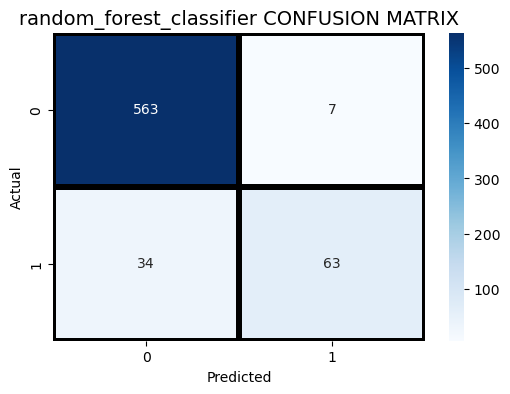

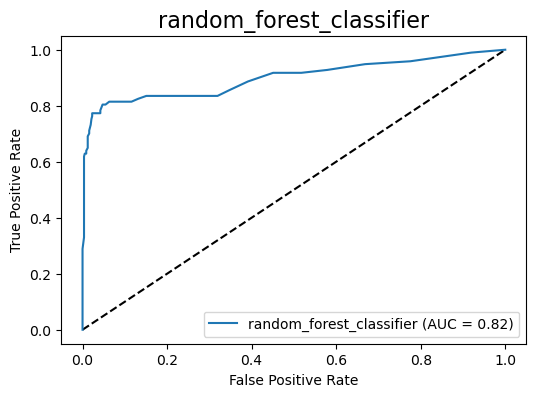

In [ ]:
# Initialize the model
model ={'logistic_regression': LogisticRegression(),
        'Ada_boost_classifier': AdaBoostClassifier(),
        'gradient_boosting_classifier': GradientBoostingClassifier(),
        'decision_tree_classifier': DecisionTreeClassifier(),
        'random_forest_classifier': RandomForestClassifier()}

# Train the model

for model_name, model in model.items():
    model.fit(X_train_transformed, y_train)
    y_pred = model.predict(X_test_transformed)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    roc_auc = roc_auc_score(y_test, y_pred)
    print(f"{model_name} ROC-AUC Score: {roc_auc}\n")
    
    # Confusion Matrix
    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True, fmt="d", linecolor="k", linewidths=3, cmap="Blues")
    plt.title(f"{model_name} CONFUSION MATRIX", fontsize=14)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # ROC Curve
    y_pred_prob = model.predict_proba(X_test_transformed)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.figure(figsize=(6,4))
    plt.plot([0, 1], [0, 1], 'k--' )
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"{model_name}", fontsize=16)
    plt.legend(loc='best')
    plt.show()


### EVALUATION
here we are going to focus on 3 evaluation.
- our main focus is increasing the number of TRUE POSITIVES (customers more likely to churn) while reducing the number of FALSE NEGATIVES (customers who are likely to churn but the model cant identify htem).
- we saw that our data is imbalanced.
- so were gona focus on this key metrics for evaluation:

- 1.precision: we want to know how many of the predicted true positives are actualy true.
- 2.recall: we want to how many of the actual true positives are predicted true positives.
- 3.Number of true positives and negatives


## Summary of Findings

##### 1. Best Model: Gradient Boosting ( 0.85 ROC-AUC)

- Highest recall for Class 1 (71%) → Best at identifying minority class.

- High precision (90%)  → Well-balanced model.

- Has 28 false negatives and 69 true positives



##### 2. Random Forest ( 0.81 ROC-AUC)

- Better than Decision Tree and AdaBoost in overall performance.

- High precision for Class 1 (90%) but recall is lower (64%) → Can miss some minority cases.

- Has 34 false negatives and 63 true positives



##### 3. Decision Tree (0.79 ROC-AUC)

- Performs well but less stable than Random Forest.

- Precision for Class 1 (65%) and a recall of (66%)

- Has 33 false negatives and 64 true positives



##### 4. AdaBoost ( 0.64 ROC-AUC)

-  Has a precision of (52%) for class 1 

- Weaker recall for class 1 (34%) → Struggles to identify minority class.

- has 64 false negatives and 33 true positives



##### 5. Logistic Regression ( 0.60 ROC-AUC)

- Very low recall for Class 1 (23%) → Poor at detecting minority class.

- Has 75 false negatives and 22 true positives

- Performs worst among all models in handling imbalanced data.




##### Key Takeaways

- Gradient Boosting is the best overall model (highest recall,  and and has the least number of false positives).

- Random Forest is strong but weaker in recall for Class 1.

- Decision Tree works but overfits compared to ensembles.

- AdaBoost and Logistic Regression struggle with class imbalance.


##### Next Steps

- hyperparameter tunning

- Feature selection and engineering to improve recall.

- Consider SMOTE or class weighting to handle imbalance better.


# 9.USING HIGHLY CORILATED COLUMNS  AND CLASS BALANCING

- we are going to balance the class using smote
- we are going to use a threshold of 0.10 for feature selection
- we are going to to use precision, recall to evaluate

In [44]:
# Import the relevant libraries 
from imblearn.over_sampling import SMOTE

# Encode the target variable 'churn'
df_copy['churn'] = df_copy['churn'].astype(int)

# Split the data into features and target
X = df_copy.drop(columns=['churn'])
y = df_copy['churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# List of columns
numerical_columns = [
    'account length', 'number vmail messages', 'total day minutes', 'total day calls',
    'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge',
    'total night minutes', 'total night calls', 'total night charge',
    'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls'
]

binary_columns = ['international plan', 'voice mail plan']
area_code_column = ['area code']

# Target encoding for state column using only training data
state_target_mean = X_train.join(y_train).groupby('state')['churn'].mean()
X_train['state'] = X_train['state'].map(state_target_mean)
X_test['state'] = X_test['state'].map(state_target_mean).fillna(state_target_mean.mean())

# Preprocessing pipelines
numerical_pipeline = Pipeline([
    ('power_transformer', PowerTransformer()),
    ('scaler', StandardScaler())
])

binary_pipeline = Pipeline([
    ('onehot', OneHotEncoder(drop='if_binary', sparse=False))
])

area_code_pipeline = Pipeline([
    ('onehot', OneHotEncoder(sparse=False))
])

# Column transformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical_columns),
    ('binary', binary_pipeline, binary_columns),
    ('area_code', area_code_pipeline, area_code_column)
], remainder='passthrough')

# Fit and transform the training data
X_train_transformed = preprocessor.fit_transform(X_train)
# Transforming it to a dataframe
X_train_transformed = pd.DataFrame(X_train_transformed, columns=preprocessor.get_feature_names_out())
X_train_transformed = X_train_transformed.astype('float32')

# Transform the test data
X_test_transformed = preprocessor.transform(X_test)
# Transforming it to a dataframe
X_test_transformed = pd.DataFrame(X_test_transformed, columns=preprocessor.get_feature_names_out())
X_test_transformed = X_test_transformed.astype('float32')

# Balance the classes using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_transformed, y_train)

# Combine the balanced training data with the target variable for correlation checking
df_correlation_checker = pd.concat([X_train_balanced, y_train_balanced.reset_index(drop=True)], axis=1)

# Check the correlation matrix
correlation_matrix = df_correlation_checker.corr()

# Get the correlation of each feature with the target variable 'churn'
correlation_with_churn = correlation_matrix['churn'].sort_values(ascending=False)

# Set a threshold for correlation
threshold = 0.10

# Select features with a correlation above the threshold
selected_features = correlation_with_churn[correlation_with_churn.abs() > threshold].index.tolist()

# Ensure 'churn' is in the selected features and then remove it to avoid data leakage
selected_features.remove('churn')

# Select the features with high correlation in both the training and testing sets
X_train_selected = X_train_balanced[selected_features]
X_test_selected = X_test_transformed[selected_features]

print("Selected Features:")
print(selected_features)


  File "c:\Users\josep\anaconda3\envs\learn-env\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\josep\anaconda3\envs\learn-env\lib\subprocess.py", line 493, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\josep\anaconda3\envs\learn-env\lib\subprocess.py", line 858, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\josep\anaconda3\envs\learn-env\lib\subprocess.py", line 1311, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


Selected Features:
['binary__international plan_yes', 'num__customer service calls', 'remainder__state', 'num__total day minutes', 'num__total day charge', 'num__total eve minutes', 'num__total eve charge', 'num__total intl minutes', 'num__total intl calls', 'num__number vmail messages', 'binary__voice mail plan_yes']


Logistic Regression Accuracy: 0.7211
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.73      0.82       570
           1       0.30      0.69      0.42        97

    accuracy                           0.72       667
   macro avg       0.62      0.71      0.62       667
weighted avg       0.84      0.72      0.76       667

Logistic Regression ROC-AUC Score: 0.7085



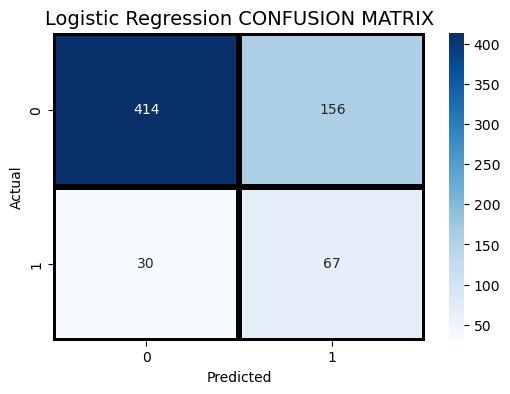

AdaBoost Classifier Accuracy: 0.8381
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       570
           1       0.46      0.59      0.51        97

    accuracy                           0.84       667
   macro avg       0.69      0.73      0.71       667
weighted avg       0.86      0.84      0.85       667

AdaBoost Classifier ROC-AUC Score: 0.7342



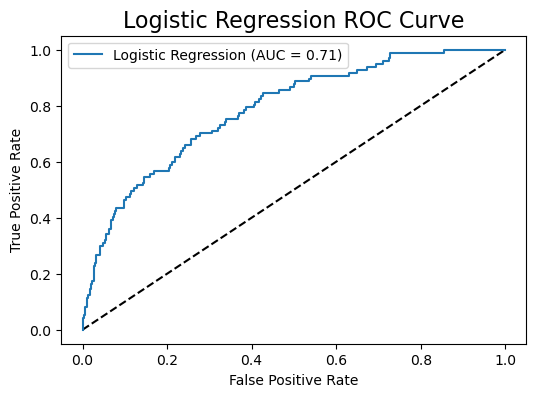

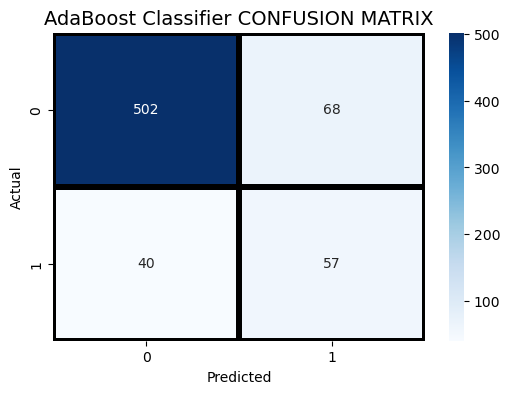

Gradient Boosting Classifier Accuracy: 0.9160
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       570
           1       0.70      0.74      0.72        97

    accuracy                           0.92       667
   macro avg       0.83      0.84      0.84       667
weighted avg       0.92      0.92      0.92       667

Gradient Boosting Classifier ROC-AUC Score: 0.8439



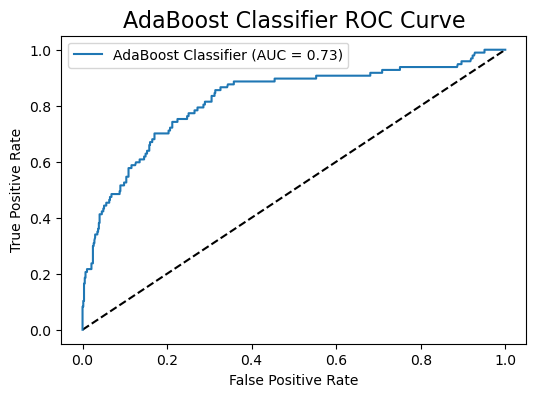

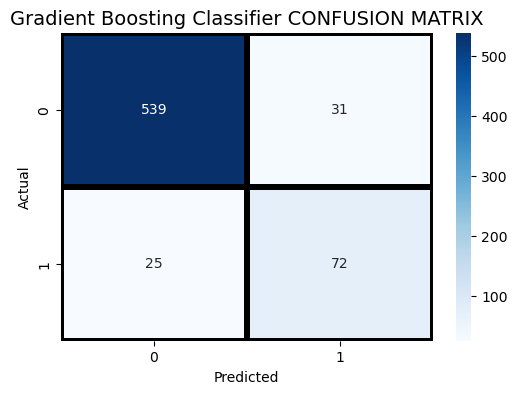

Decision Tree Classifier Accuracy: 0.8891
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       570
           1       0.61      0.68      0.64        97

    accuracy                           0.89       667
   macro avg       0.77      0.80      0.79       667
weighted avg       0.90      0.89      0.89       667

Decision Tree Classifier ROC-AUC Score: 0.8025



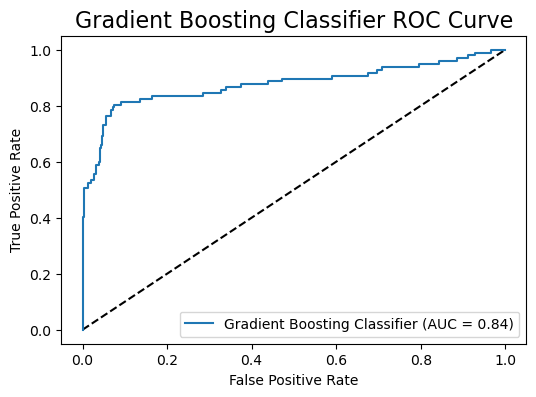

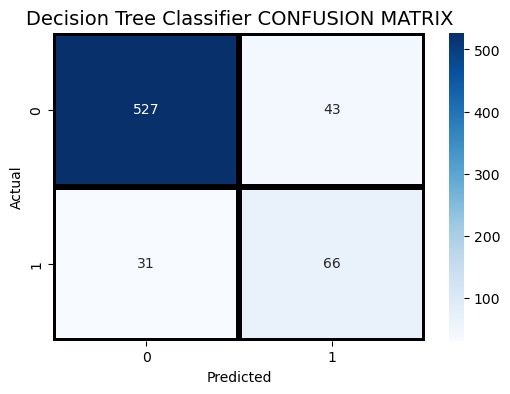

Random Forest Classifier Accuracy: 0.9250
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       570
           1       0.74      0.74      0.74        97

    accuracy                           0.93       667
   macro avg       0.85      0.85      0.85       667
weighted avg       0.93      0.93      0.93       667

Random Forest Classifier ROC-AUC Score: 0.8492



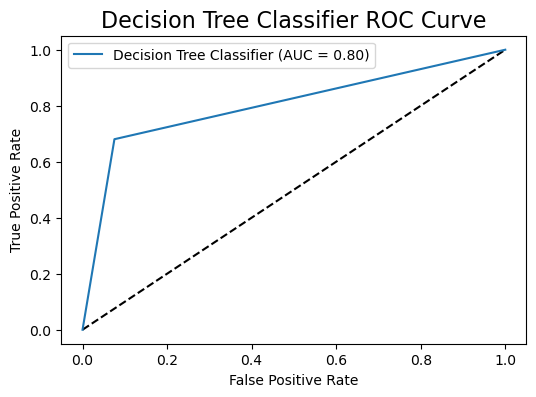

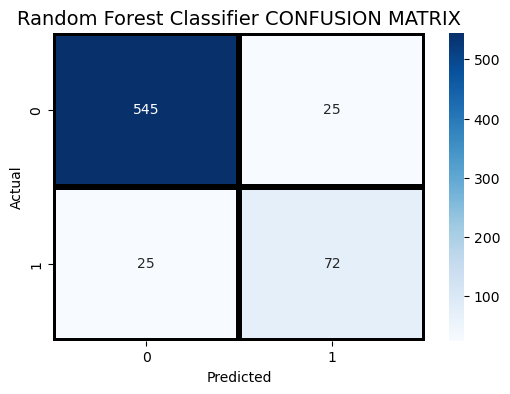

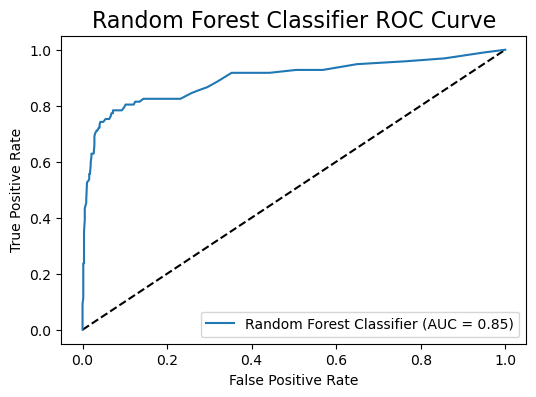

In [45]:
# Initialize the model dictionary
models = {
    'Logistic Regression': LogisticRegression(),
    'AdaBoost Classifier': AdaBoostClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train_selected, y_train_balanced)
    y_pred = model.predict(X_test_selected)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    roc_auc = roc_auc_score(y_test, y_pred)
    print(f"{model_name} ROC-AUC Score: {roc_auc:.4f}\n")
    
    # Confusion Matrix
    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True, fmt="d", linecolor="k", linewidths=3, cmap="Blues")
    plt.title(f"{model_name} CONFUSION MATRIX", fontsize=14)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # ROC Curve
    y_pred_prob = model.predict_proba(X_test_selected)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.figure(figsize=(6,4))
    plt.plot([0, 1], [0, 1], 'k--' )
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"{model_name} ROC Curve", fontsize=16)
    plt.legend(loc='best')


## EVALUATION
- the best are Random Forest and Gadient Boosting.
- Random forest model has with a recall and precision of (74%) with 25 false negatives and 72 true possitives.
- Gradient boosting has the ssame recal and precision as random forest eith the same number of false negatives and 72 true possitives.
- It slightly outperformed Gradient Boosting, especially in precision for churn cases (0.74 vs. 0.70) while maintaining the same recall (0.74).
- The models can be further optimized through hyperparameter tuning and feature importance analysis. 

#### NEXT STEPS
- were are now going to focous on our 2 best performing models
- random forest and gadient boosting
- perform feature importance analysis to understand which features are most important for predicting churn

# 10.FEATURE SELECTION

In [64]:
# Import the relevant libraries
from sklearn.feature_selection import SelectFromModel


# Encode the target variable 'churn'
df['churn'] = df['churn'].astype(int)

# Split the data into features and target
X = df.drop(columns=['churn'])
y = df['churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# List of columns
numerical_columns = [
    'account length', 'number vmail messages', 'total day minutes', 'total day calls',
    'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge',
    'total night minutes', 'total night calls', 'total night charge',
    'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']

binary_columns = ['international plan', 'voice mail plan']
categorical_columns = ['state']
area_code_column = ['area code']

# Target encoding for state column
state_target_mean = X_train.join(y_train).groupby('state')['churn'].mean()
X_train['state'] = X_train['state'].map(state_target_mean)
X_test['state'] = X_test['state'].map(state_target_mean).fillna(state_target_mean.mean())

# Preprocessing pipelines
numerical_pipeline = Pipeline([
    ('power_transformer', PowerTransformer()),
    ('scaler', StandardScaler())
])

binary_pipeline = Pipeline([
    ('onehot', OneHotEncoder(drop='if_binary', sparse=False))
])

area_code_pipeline = Pipeline([
    ('onehot', OneHotEncoder(sparse=False))
])

# Column transformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical_columns),
    ('binary', binary_pipeline, binary_columns),
    ('area_code', area_code_pipeline, area_code_column)
], remainder='passthrough')

# Fit and transform the training data
X_train_transformed = preprocessor.fit_transform(X_train)
# transforming it to a dataframe
X_train_transformed = pd.DataFrame(X_train_transformed, columns=preprocessor.get_feature_names_out())
X_train_transformed = X_train_transformed.astype('float32')

# Transform the test data
X_test_transformed = preprocessor.transform(X_test)
# transforming it to a dataframe
X_test_transformed = pd.DataFrame(X_test_transformed, columns=preprocessor.get_feature_names_out())
X_test_transformed = X_test_transformed.astype('float32')

# Balance the classes using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_transformed, y_train)

# Feature selection using Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_balanced, y_train_balanced)

# Select features based on importance
sfm = SelectFromModel(clf, prefit=True, threshold=-np.inf, max_features=10)
X_train_selected = sfm.transform(X_train_balanced)
X_test_selected = sfm.transform(X_test_transformed)

# Get the selected feature names
selected_features = preprocessor.get_feature_names_out()[sfm.get_support()]

print("Selected Features:")
print(selected_features)


Selected Features:
['num__total day minutes' 'num__total day charge' 'num__total eve minutes'
 'num__total eve charge' 'num__total night minutes'
 'num__total intl minutes' 'num__total intl calls'
 'num__customer service calls' 'binary__international plan_yes'
 'remainder__state']


Logistic Regression Accuracy: 0.7181
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.72      0.81       570
           1       0.30      0.68      0.41        97

    accuracy                           0.72       667
   macro avg       0.61      0.70      0.61       667
weighted avg       0.84      0.72      0.76       667

Logistic Regression ROC-AUC Score: 0.7025



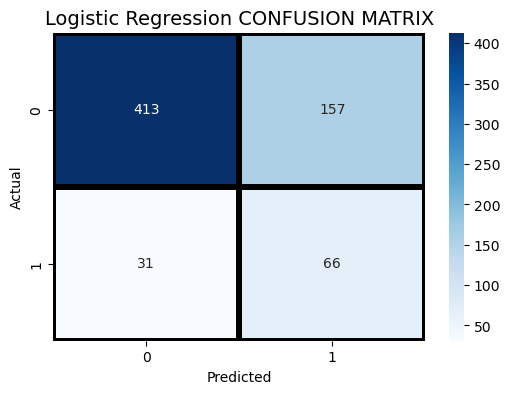

AdaBoost Classifier Accuracy: 0.8291
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       570
           1       0.43      0.54      0.48        97

    accuracy                           0.83       667
   macro avg       0.67      0.71      0.69       667
weighted avg       0.85      0.83      0.84       667

AdaBoost Classifier ROC-AUC Score: 0.7075



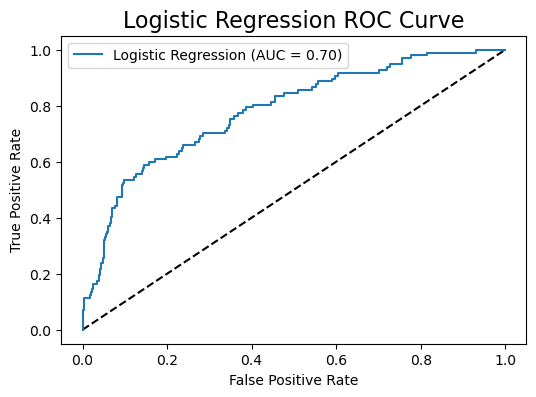

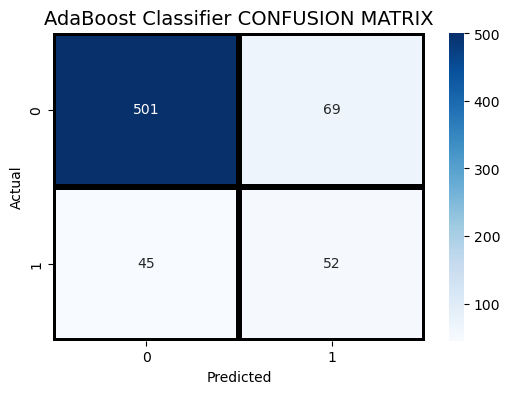

Gradient Boosting Classifier Accuracy: 0.9025
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       570
           1       0.65      0.71      0.68        97

    accuracy                           0.90       667
   macro avg       0.80      0.82      0.81       667
weighted avg       0.91      0.90      0.90       667

Gradient Boosting Classifier ROC-AUC Score: 0.8232



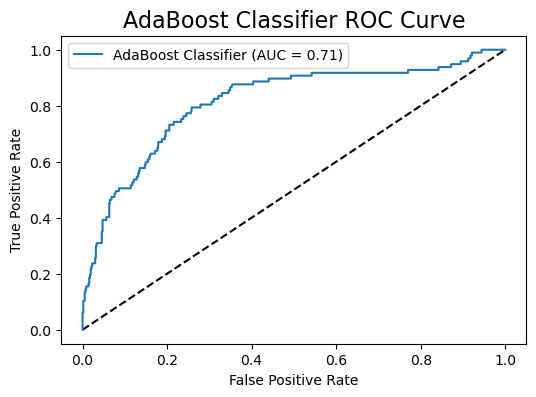

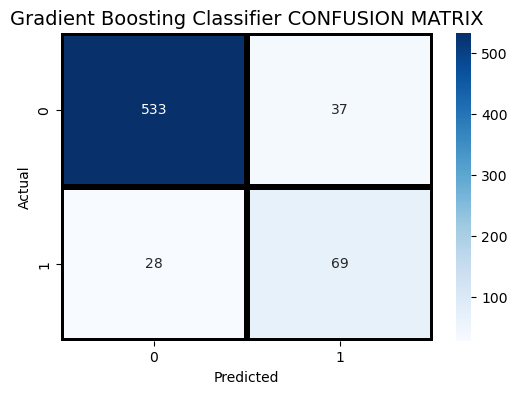

Decision Tree Classifier Accuracy: 0.9025
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       570
           1       0.64      0.75      0.69        97

    accuracy                           0.90       667
   macro avg       0.80      0.84      0.82       667
weighted avg       0.91      0.90      0.91       667

Decision Tree Classifier ROC-AUC Score: 0.8403



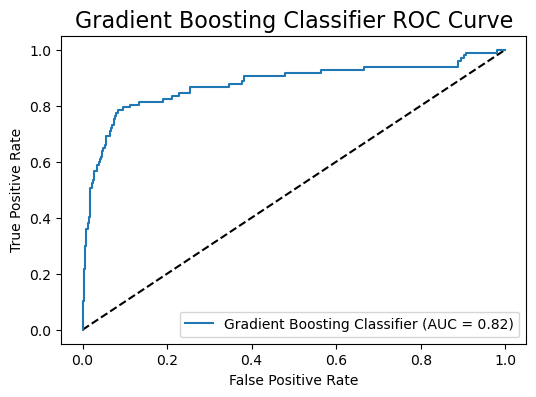

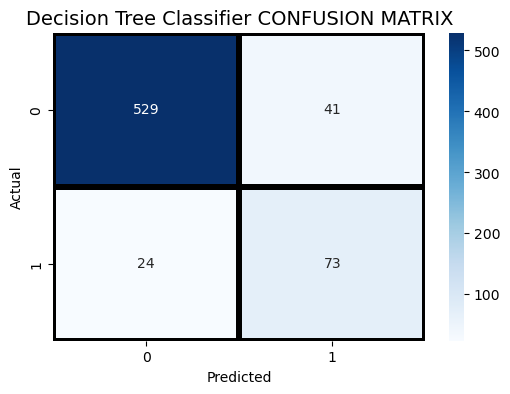

Random Forest Classifier Accuracy: 0.9175
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       570
           1       0.69      0.77      0.73        97

    accuracy                           0.92       667
   macro avg       0.83      0.86      0.84       667
weighted avg       0.92      0.92      0.92       667

Random Forest Classifier ROC-AUC Score: 0.8577



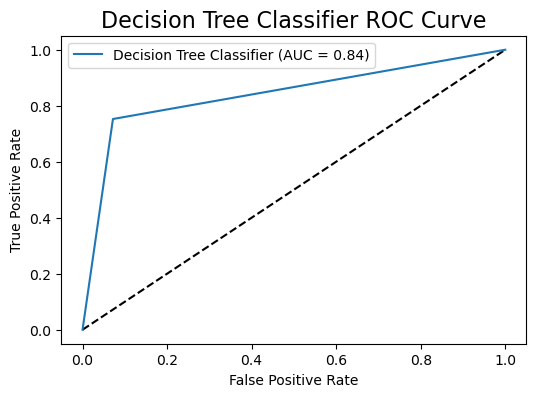

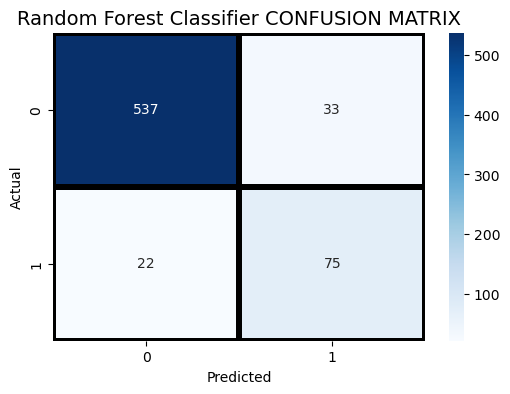

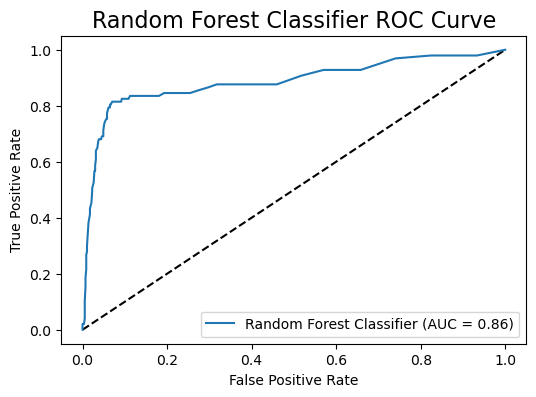

In [63]:
# Initialize the model dictionary
models = {
    'Logistic Regression': LogisticRegression(),
    'AdaBoost Classifier': AdaBoostClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train_selected, y_train_balanced)
    y_pred = model.predict(X_test_selected)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    roc_auc = roc_auc_score(y_test, y_pred)
    print(f"{model_name} ROC-AUC Score: {roc_auc:.4f}\n")
    
    # Confusion Matrix
    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True, fmt="d", linecolor="k", linewidths=3, cmap="Blues")
    plt.title(f"{model_name} CONFUSION MATRIX", fontsize=14)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # ROC Curve
    y_pred_prob = model.predict_proba(X_test_selected)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.figure(figsize=(6,4))
    plt.plot([0, 1], [0, 1], 'k--' )
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"{model_name} ROC Curve", fontsize=16)
    plt.legend(loc='best')


### SAMMARY
- from feature selection we have seen that our best model is random forest
- it has a recal of (77%) for class 1 and it has the least false negative 22

# 11. HYPER PARAMETER TUNNING ON RANDOM FOREST,GRADIENT BOOSTING AND LIGHTGBM

In [47]:
from sklearn.model_selection import RandomizedSearchCV

#### RANDOM FOREST

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False}
Random Forest Accuracy: 0.9190
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       570
           1       0.70      0.76      0.73        97

    accuracy                           0.92       667
   macro avg       0.83      0.85      0.84       667
weighted avg       0.92      0.92      0.92       667

Random Forest ROC-AUC Score: 0.8543



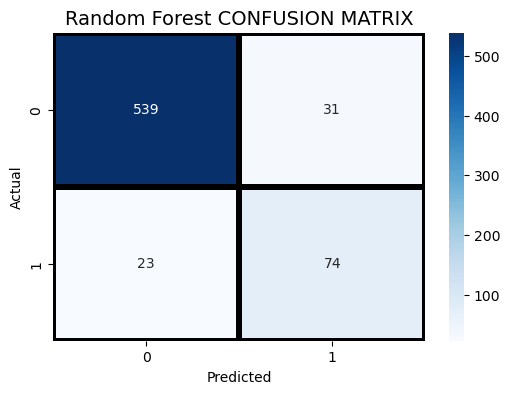

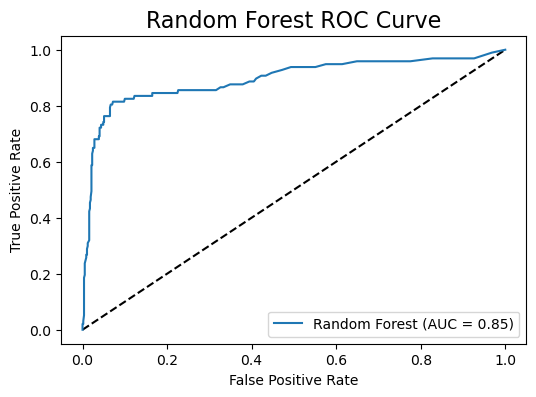

In [65]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid with more options
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV with a higher number of iterations
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid,
                                   n_iter=50, scoring='roc_auc', cv=3, random_state=42, n_jobs=-1, verbose=2)

# Fit the Random Search model
random_search.fit(X_train_selected, y_train_balanced)

# Get the best parameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best parameters
best_rf_model = random_search.best_estimator_

# Predict on the test data
y_pred = best_rf_model.predict(X_test_selected)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_pred)
print(f"Random Forest ROC-AUC Score: {roc_auc:.4f}\n")

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt="d", linecolor="k", linewidths=3, cmap="Blues")
plt.title(f"Random Forest CONFUSION MATRIX", fontsize=14)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
y_pred_prob = best_rf_model.predict_proba(X_test_selected)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(6,4))
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc:.2f})")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f"Random Forest ROC Curve", fontsize=16)
plt.legend(loc='best')
plt.show()


- we can see that after hyper parameter tuning the the model performance didint quite change but there is an increase of 0.01 in the recall and precision 
- the number of false positives rised by one and the number of true positives decreased by one

#### GRADIENT BOOSTING

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Hyperparameters: {'subsample': 0.6, 'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 6, 'learning_rate': 0.1}
Gradient Boosting Accuracy: 0.9250
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       570
           1       0.74      0.75      0.74        97

    accuracy                           0.93       667
   macro avg       0.85      0.85      0.85       667
weighted avg       0.93      0.93      0.93       667

Gradient Boosting ROC-AUC Score: 0.8535



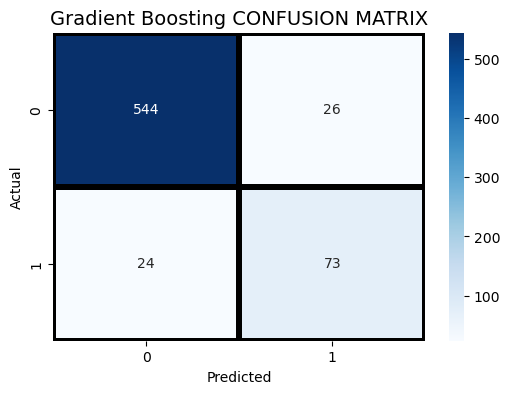

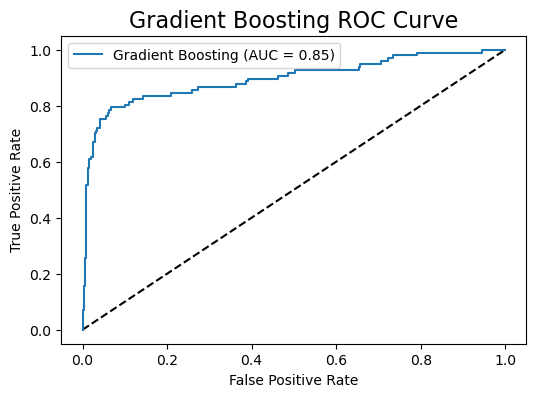

In [66]:
# Import the relevant libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Define the parameter grid with more options
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.6, 0.8, 1.0]
}

# Initialize RandomizedSearchCV with a higher number of iterations
random_search = RandomizedSearchCV(estimator=gb_model, param_distributions=param_grid,
                                   n_iter=50, scoring='roc_auc', cv=3, random_state=42, n_jobs=-1, verbose=2)

# Fit the Random Search model
random_search.fit(X_train_selected, y_train_balanced)

# Get the best parameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best parameters
best_gb_model = random_search.best_estimator_

# Predict on the test data
y_pred = best_gb_model.predict(X_test_selected)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Gradient Boosting Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_pred)
print(f"Gradient Boosting ROC-AUC Score: {roc_auc:.4f}\n")

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt="d", linecolor="k", linewidths=3, cmap="Blues")
plt.title(f"Gradient Boosting CONFUSION MATRIX", fontsize=14)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
y_pred_prob = best_gb_model.predict_proba(X_test_selected)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(6,4))
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label=f"Gradient Boosting (AUC = {roc_auc:.2f})")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f"Gradient Boosting ROC Curve", fontsize=16)
plt.legend(loc='best')
plt.show()


## EVALUATION

- Random Forest has a slightly higher recall for Class 1 (0.76 vs. 0.70), meaning it catches more positives but has slightly lower precision.

- Gradient Boosting has slightly better precision (0.74 vs. 0.75) but misses more positives (higher false negatives).

##### Random Forest is more stable, while Gradient Boosting might generalize better with fine-tuning.


##### LIGHTGBM MODEL

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[LightGBM] [Info] Number of positive: 2280, number of negative: 2280
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000953 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2549
[LightGBM] [Info] Number of data points in the train set: 4560, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

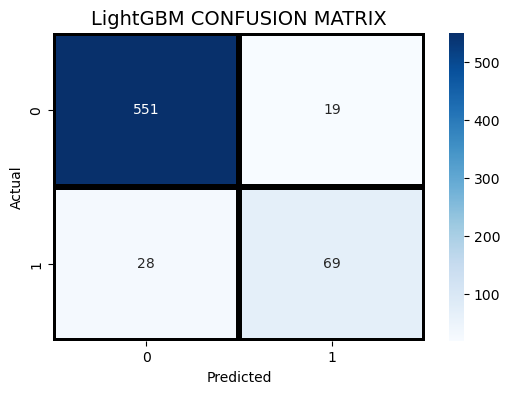

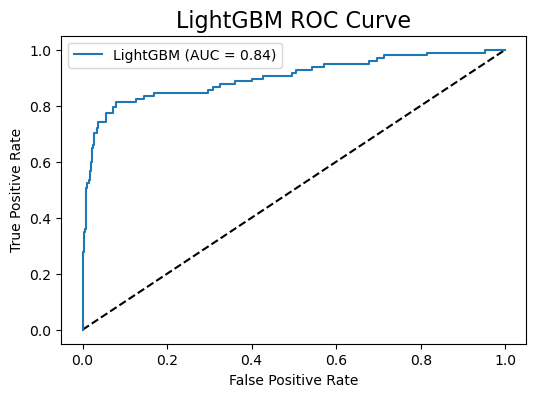

In [67]:
# Import the necessary libraries
import lightgbm as lgb
import seaborn as sns

# Initialize the LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)

# Define the parameter grid with more options
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5, 6],
    'num_leaves': [31, 40, 50],
    'min_child_samples': [20, 30, 40],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize RandomizedSearchCV with a higher number of iterations
random_search = RandomizedSearchCV(estimator=lgb_model, param_distributions=param_grid,
                                   n_iter=50, scoring='roc_auc', cv=3, random_state=42, n_jobs=-1, verbose=2)

# Fit the Random Search model
random_search.fit(X_train_selected, y_train_balanced)

# Get the best parameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best parameters
best_lgb_model = random_search.best_estimator_

# Predict on the test data
y_pred = best_lgb_model.predict(X_test_selected)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"LightGBM Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_pred)
print(f"LightGBM ROC-AUC Score: {roc_auc:.4f}\n")

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt="d", linecolor="k", linewidths=3, cmap="Blues")
plt.title(f"LightGBM CONFUSION MATRIX", fontsize=14)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
y_pred_prob = best_lgb_model.predict_proba(X_test_selected)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(6,4))
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label=f"LightGBM (AUC = {roc_auc:.2f})")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f"LightGBM ROC Curve", fontsize=16)
plt.legend(loc='best')
plt.show()


## EVALUATION

- Random Forest has a slightly higher recall for Class 1 (0.76 vs. 0.75), meaning it catches more positives but has slightly lower precision.

- Gradient Boosting has slightly better precision (0.74 vs. 0.70) but misses more positives (higher false negatives).

- LightGBM False negatives are slightly higher
- Random Forest is likely the best model so far, as it offers a balance between recall and precision ..


# we can now confidently conclude that our best model to predict wich customer is morelikely to churn Random forest 
# with a class 1 recall of 76% 
# it has the least number of false negatives totalling at 23